In [2]:
# Cell 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')

In [3]:
# Cell 2: Load Data
# This dataset is a publicly available Telco Churn dataset from IBM
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
df = pd.read_csv(url)

In [4]:
# Cell 3: Initial Inspection
print("--- First 5 Rows ---")
display(df.head())

print("\n--- Data Info ---")
df.info()

print("\n--- Missing Values ---")
print(df.isnull().sum())

--- First 5 Rows ---


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 

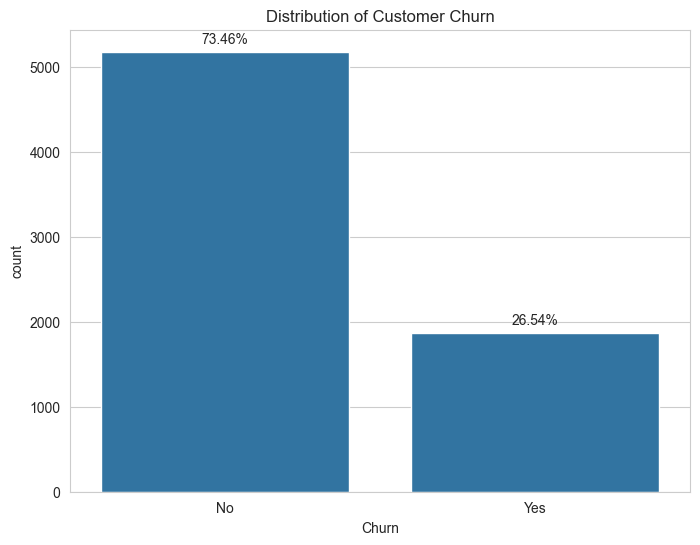

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [5]:
# Cell 4: Analyze the 'Churn' column
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Churn', data=df)
plt.title('Distribution of Customer Churn')

# Add percentages on top of the bars
for p in ax.patches:
    ax.annotate(f'{100 * p.get_height() / len(df):.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')
plt.show()

print(df['Churn'].value_counts(normalize=True))

In [6]:
# Cell 5: Fix 'TotalCharges'
# First, find out what the non-numeric values are. It's usually empty strings ' '.
# df['TotalCharges'].str.isnumeric() == False
# We find that there are 11 rows with ' '
print(f"Number of empty strings in TotalCharges: {len(df[df['TotalCharges'] == ' '])}")

# Convert the column to numeric, coercing errors to NaN (Not a Number)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now, let's check for NaNs
print(f"Number of NaNs after coercion: {df['TotalCharges'].isnull().sum()}")

# For this simple case, we can impute the missing values.
# The median is a good choice as it's robust to outliers.
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_total_charges, inplace=True)

print("\n--- Data Info After Cleaning ---")
df.info()

Number of empty strings in TotalCharges: 11
Number of NaNs after coercion: 11

--- Data Info After Cleaning ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 n

C:\Users\farro\AppData\Local\Temp\ipykernel_43216\2506194424.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(median_total_charges, inplace=True)


### Metric Decision

Primary Metric: ROC AUC (Area Under the Receiver Operating Characteristic Curve). It's the best choice for this imbalanced classification problem because it measures the model's ability to discriminate between positive and negative classes.

Secondary Metric: Precision-Recall AUC (PR-AUC). Also excellent for imbalanced data, focusing on the performance of the positive (churn) class.

### Project Baseline

Dummy Performance: A random model would have an ROC AUC of 0.5.

Acceptance Criteria: To move forward into deployment, our trained model must achieve an ROC AUC greater than 0.82 on the holdout validation set. This provides a clear, measurable goal for our modeling phase.